<a href="https://colab.research.google.com/github/HwangHanJae/recommender_system/blob/main/inflearn_recsys/DL_Keras_MF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 로드

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax

# 데이터 로드

In [2]:
#u.data의 파일경로 지정
#베이스 경로 설정
base = '/content/drive/MyDrive/RecoSys/Data'
u_data_path = os.path.join(base, 'u.data')

#필요한 컬럼 정의
r_cols = ['user_id', 'movie_id','rating','timestamp']

#데이터 읽어오기
ratings = pd.read_csv(u_data_path, sep='\t',names = r_cols, encoding='latin-1')

#상위 5개
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
ratings_train, ratings_test = train_test_split(ratings,
                                              test_size=0.2,
                                              shuffle=True,
                                              random_state=2021)


In [4]:
#잠재요인의 수
K = 200
# 평균
mu = ratings_train['rating'].mean()

M = ratings['user_id'].max() + 1
N = ratings['movie_id'].max() + 1

def RMSE(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_true-y_pred)))

In [5]:
user = Input(shape=(1,))
item = Input(shape=(1,))
P_embedding = Embedding(M, K, embeddings_regularizer = l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer = l2())(item)

user_bias =Embedding(M,1,embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

In [6]:
R = layers.dot([P_embedding, Q_embedding], axes = (2,2))
R = layers.add([R, user_bias, item_bias])

R = Flatten()(R)

model = Model(inputs=[user, item], outputs=R)
model.compile(
    loss = RMSE,
    optimizer = SGD(),
    metrics = [RMSE]
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 200)       188800      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 200)       336600      ['input_2[0][0]']                
                                                                                              

In [19]:
result = model.fit(
    x = [ratings_train['user_id'].values,
         ratings_train['movie_id'].values],
    y = ratings_train['rating'].values - mu,

    epochs = 60,
    batch_size = 256,
    validation_data = (
        [ratings_test['user_id'].values,
         ratings_test['movie_id'].values],
         ratings_test['rating'].values - mu
    )
)

Epoch 1/60
313/313 [==============================] - 3s 8ms/step - loss: 5.2670 - RMSE: 1.1260 - val_loss: 5.0028 - val_RMSE: 1.1168
Epoch 2/60
313/313 [==============================] - 2s 6ms/step - loss: 4.7777 - RMSE: 1.1240 - val_loss: 4.5436 - val_RMSE: 1.1149
Epoch 3/60
313/313 [==============================] - 2s 7ms/step - loss: 4.3458 - RMSE: 1.1219 - val_loss: 4.1385 - val_RMSE: 1.1130
Epoch 4/60
313/313 [==============================] - 2s 6ms/step - loss: 3.9649 - RMSE: 1.1201 - val_loss: 3.7811 - val_RMSE: 1.1113
Epoch 5/60
313/313 [==============================] - 2s 7ms/step - loss: 3.6288 - RMSE: 1.1183 - val_loss: 3.4658 - val_RMSE: 1.1098
Epoch 6/60
313/313 [==============================] - 2s 7ms/step - loss: 3.3322 - RMSE: 1.1170 - val_loss: 3.1877 - val_RMSE: 1.1084
Epoch 7/60
313/313 [==============================] - 2s 7ms/step - loss: 3.0707 - RMSE: 1.1155 - val_loss: 2.9423 - val_RMSE: 1.1070
Epoch 8/60
313/313 [==============================] - 2s 6ms/s

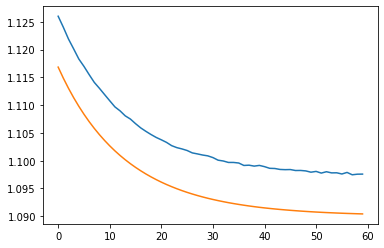

In [22]:
import matplotlib.pyplot as plt
plt.plot(result.history['RMSE'], label = 'Train RMSE')
plt.plot(result.history['val_RMSE'], label='Test RMSE')
plt.show()

# 딥러닝 추천시스템

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax
from tensorflow.keras.layers import Dense, Concatenate, Activation

In [8]:
#잠재요인의 수
K = 200
# 평균
mu = ratings_train['rating'].mean()

M = ratings['user_id'].max() + 1
N = ratings['movie_id'].max() + 1

def RMSE(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_true-y_pred)))

In [9]:
user = Input(shape=(1,))
item = Input(shape=(1,))
P_embedding = Embedding(M, K, embeddings_regularizer = l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer = l2())(item)

user_bias =Embedding(M,1,embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias])

R = Dense(2048)(R)
R = Activation('linear')(R)

R = Dense(256)(R)
R = Activation('linear')(R)

R = Dense(1)(R)

model = Model(inputs = [user, item], outputs = R)
model.compile(
    loss = RMSE,
    optimizer = SGD(),
    metrics = [RMSE]
)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 200)       188800      ['input_3[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 200)       336600      ['input_4[0][0]']                
                                                                                            

In [10]:
train_user_ids = ratings_train['user_id'].values
train_movie_ids = ratings_train['movie_id'].values
train_ratings = ratings_train['rating'].values

test_user_ids = ratings_test['user_id'].values
test_movie_ids = ratings_test['movie_id'].values
test_ratings = ratings_test['rating'].values

result = model.fit(
    x = [train_user_ids, train_movie_ids],
    y = train_ratings - mu,
    epochs= 65,
    batch_size=512,
    validation_data = ([test_user_ids, test_movie_ids],
                       test_ratings - mu)

)

Epoch 1/65
157/157 [==============================] - 4s 7ms/step - loss: 5.3922 - RMSE: 1.1269 - val_loss: 5.2489 - val_RMSE: 1.1177
Epoch 2/65
157/157 [==============================] - 1s 4ms/step - loss: 5.1307 - RMSE: 1.1256 - val_loss: 4.9956 - val_RMSE: 1.1159
Epoch 3/65
157/157 [==============================] - 1s 4ms/step - loss: 4.8852 - RMSE: 1.1232 - val_loss: 4.7579 - val_RMSE: 1.1142
Epoch 4/65
157/157 [==============================] - 1s 5ms/step - loss: 4.6547 - RMSE: 1.1221 - val_loss: 4.5346 - val_RMSE: 1.1126
Epoch 5/65
157/157 [==============================] - 1s 4ms/step - loss: 4.4381 - RMSE: 1.1201 - val_loss: 4.3248 - val_RMSE: 1.1109
Epoch 6/65
157/157 [==============================] - 1s 4ms/step - loss: 4.2345 - RMSE: 1.1181 - val_loss: 4.1277 - val_RMSE: 1.1091
Epoch 7/65
157/157 [==============================] - 1s 5ms/step - loss: 4.0432 - RMSE: 1.1161 - val_loss: 3.9423 - val_RMSE: 1.1072
Epoch 8/65
157/157 [==============================] - 1s 4ms/s

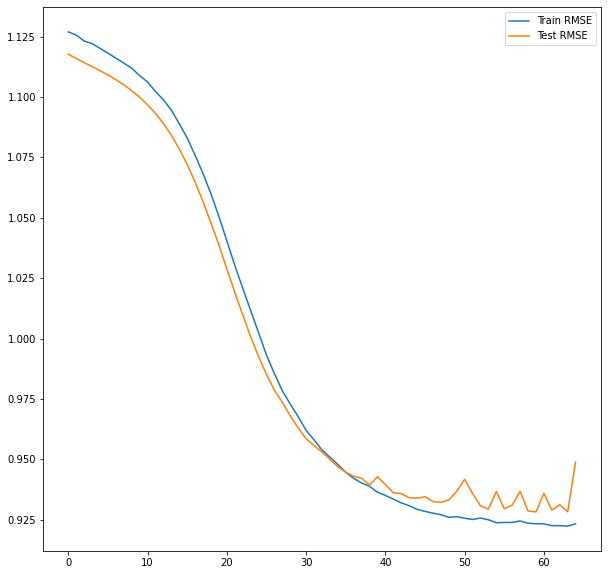

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(result.history['RMSE'], label = 'Train RMSE')
plt.plot(result.history['val_RMSE'], label='Test RMSE')
plt.legend()
plt.show()

# 딥러닝 모델에 변수 추가하기

In [14]:
#u.data의 파일경로 지정
#베이스 경로 설정
base = '/content/drive/MyDrive/RecoSys/Data'
u_data_path = os.path.join(base, 'u.data')

#필요한 컬럼 정의
r_cols = ['user_id', 'movie_id','rating','timestamp']

#데이터 읽어오기
ratings = pd.read_csv(u_data_path, sep='\t',names = r_cols, encoding='latin-1')

# u.user 파일 경로 설정
u_user_path = os.path.join(base, 'u.user')

#필요한 컬럼 정의
u_cols = ['user_id','age','sex','occupation','zip_code']

#데이터 읽어오기
users = pd.read_csv(u_user_path, sep='|', names = u_cols, encoding='latin-1')

#상위 5개
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 필요한 데이터만 추출하기

In [13]:
rating_train, rating_test = train_test_split(ratings,
                                             test_size=0.2,
                                             shuffle=True,
                                             random_state=2021)

In [16]:
users = users[['user_id','occupation']]

#직업(occupation)을 정수로 변경
occupation = {}
def convert_occ(x):
  if x in occupation:
    return occupation[x]
  else:
    occupation[x] = len(occupation)
    return occupation[x]

users['occupation'] = users['occupation'].apply(convert_occ)

L = len(occupation)

train_occ = pd.merge(rating_train, users, on='user_id')['occupation']
test_occ = pd.merge(rating_test, users, on='user_id')['occupation']

K = 200
mu = rating_train['rating'].mean()

M = ratings['user_id'].max() + 1
N = ratings['movie_id'].max() + 1

user = Input(shape=(1,))
item = Input(shape=(1,))

P_embedding = Embedding(M, K, embeddings_regularizer = l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer = l2())(item)

user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)

user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

occ = Input(shape=(1,))
OCC_embedding = Embedding(L, 3, embeddings_regularizer=l2())(occ)
OCC_layer = Flatten()(OCC_embedding)

R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias, OCC_layer])

R = Dense(2048)(R)
R= Activation('linear')(R)
R =Dense(256)(R)
R =Activation('linear')(R)
R= Dense(1)(R)

model = Model(inputs = [user, item, occ], outputs = R)
model.compile(
    loss = RMSE,
    optimizer=SGD(),
    metrics = [RMSE]
)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_13 (Embedding)       (None, 1, 200)       188800      ['input_8[0][0]']                
                                                                                            

In [17]:
train_user_ids = ratings_train['user_id'].values
train_movie_ids = ratings_train['movie_id'].values
train_ratings = ratings_train['rating'].values
train_occs = train_occ.values

test_user_ids = ratings_test['user_id'].values
test_movie_ids = ratings_test['movie_id'].values
test_ratings = ratings_test['rating'].values
test_occs = test_occ.values

result = model.fit(
    x = [train_user_ids, train_movie_ids, train_occs],
    y = train_ratings - mu,
    epochs = 65,
    batch_size=512,
    validation_data = (
        [test_user_ids, test_movie_ids, test_occs],
        test_ratings - mu
    )
)

Epoch 1/65
157/157 [==============================] - 3s 10ms/step - loss: 5.3875 - RMSE: 1.1264 - val_loss: 5.2442 - val_RMSE: 1.1172
Epoch 2/65
157/157 [==============================] - 1s 5ms/step - loss: 5.1262 - RMSE: 1.1253 - val_loss: 4.9913 - val_RMSE: 1.1155
Epoch 3/65
157/157 [==============================] - 1s 5ms/step - loss: 4.8811 - RMSE: 1.1234 - val_loss: 4.7539 - val_RMSE: 1.1139
Epoch 4/65
157/157 [==============================] - 1s 5ms/step - loss: 4.6507 - RMSE: 1.1211 - val_loss: 4.5309 - val_RMSE: 1.1123
Epoch 5/65
157/157 [==============================] - 1s 5ms/step - loss: 4.4343 - RMSE: 1.1202 - val_loss: 4.3213 - val_RMSE: 1.1106
Epoch 6/65
157/157 [==============================] - 1s 5ms/step - loss: 4.2310 - RMSE: 1.1179 - val_loss: 4.1243 - val_RMSE: 1.1088
Epoch 7/65
157/157 [==============================] - 1s 5ms/step - loss: 4.0399 - RMSE: 1.1158 - val_loss: 3.9391 - val_RMSE: 1.1069
Epoch 8/65
157/157 [==============================] - 1s 5ms/

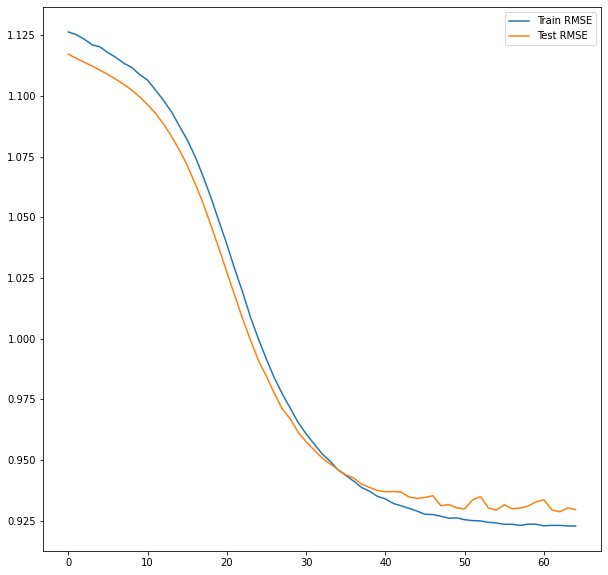

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(result.history['RMSE'], label = 'Train RMSE')
plt.plot(result.history['val_RMSE'], label='Test RMSE')
plt.legend()
plt.show()